In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.
file1 = pd.read_csv("C:/Users/igrav/Desktop/ironhack/Lecture/Week_1/Day5/AM/lab-customer-analysis-round-6-master/files_for_lab/csv_files/marketing_customer_analysis.csv")
file1.head(5)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
numerical = file1.select_dtypes(["int", "float"])
numerical.head(5)
categorical = file1.select_dtypes(["object"])
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [4]:
numerical.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [5]:
# Normalize (numerical).
from sklearn.preprocessing import MinMaxScaler 
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(numerical) 
N_normalized = MinMaxtransformer.transform(numerical) 
N_normalized = pd.DataFrame(N_normalized,columns=numerical.columns) 
N_normalized.head(5)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [6]:
N_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
Income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
Monthly Premium Auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
Months Since Last Claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
Months Since Policy Inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
Number of Open Complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
Number of Policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0
Total Claim Amount,9134.0,0.150006,0.100410,0.0,0.094071,0.132675,0.189212,1.0


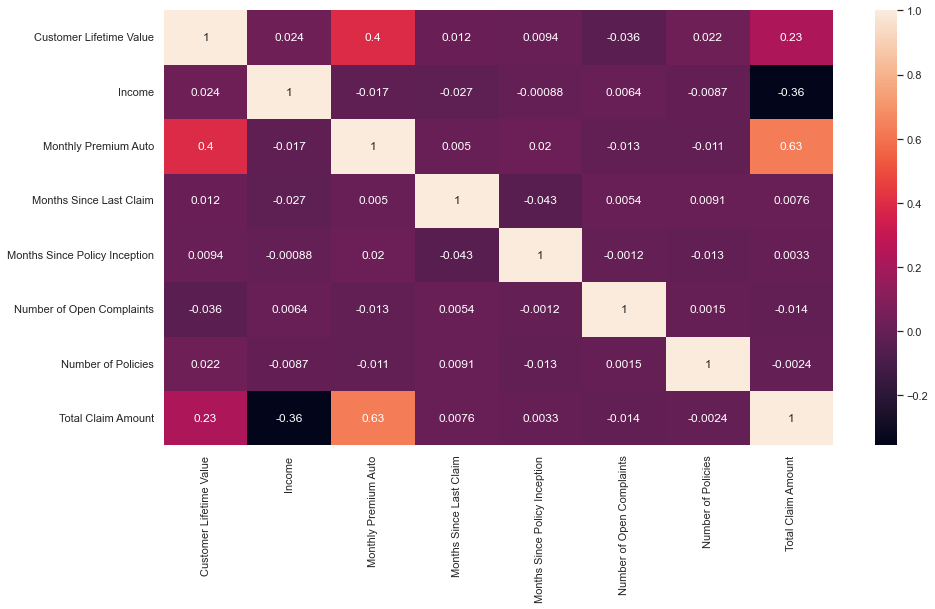

In [14]:
corr_matrix = numerical.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
categorical['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [8]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# encoder.fit(categorical) # This determines how many unique values has each categorical column
# print(encoder.categories_)
# encoded = encoder.transform(categorical).toarray()
# print(encoded)
# onehot_encoded = pd.DataFrame(encoded,columns=categorical.columns)
# onehot_encoded.head(20)



cat = pd.get_dummies(categorical, categorical.columns, drop_first=True)
display(cat)
print(cat.shape)
file2 = pd.concat([numerical, cat], axis = 1)
file2


# corr_matrix = cat2.corr()
# sns.set(rc={'figure.figsize':(15,8)})
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


(9134, 9234)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer_AA11235,Customer_AA16582,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,8163.890428,0,85,9,37,3,2,790.784983,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,0,0,...,1,0,0,0,0,0,0,0,0,0


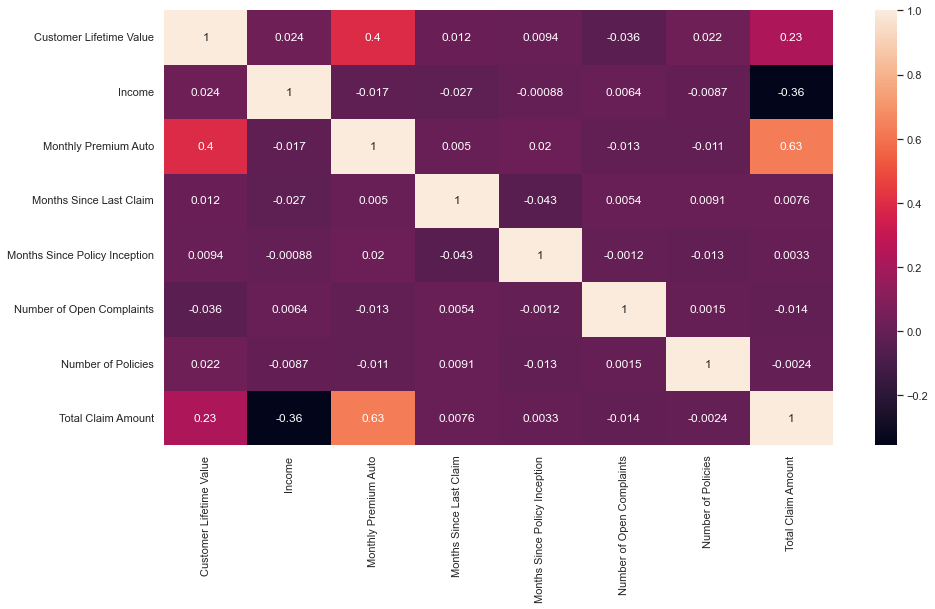

In [16]:
# X-y split
y = N_normalized['Total Claim Amount']
X = N_normalized.drop(['Total Claim Amount'], axis=1)
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 7)
(1827, 7)
(7307,)
(1827,)
